<a href="https://colab.research.google.com/github/vinayakgautam368/Memes-vs-Notes/blob/master/Copy_of_mems_vs_notes_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from tqdm import tqdm
import  cv2
from numpy import save
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle

In [2]:
 

directory="drive/My Drive/memesnotes/Stage_2"
CATEGORIES=["Memes","Notes"]
data=[]
original_set=[]
size=64
for category in CATEGORIES:
  path=os.path.join(directory,category)
  
  label=CATEGORIES.index(category)
  for img in os.listdir(path):
    
    try:
      org_img=cv2.imread(os.path.join(path,img))
      img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
     
      img_arr=cv2.resize(img_arr,(size,size))
      org_img=cv2.resize(org_img,(size,size))
      data.append([img_arr,np.eye(2)[label]])
      original_set.append([org_img,np.eye(2)[label]])
    except Exception as e:
      pass




    


In [3]:
# from sklearn.utils import shuffle
# a = ['a', 'b', 'c','d','e']
# b = [1, 2, 3, 4, 5]

# a_shuffled, b_shuffled = shuffle(a, b)
# print(a_shuffled, b_shuffled)
# print(type(a_shuffled))

1600


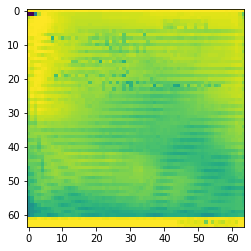

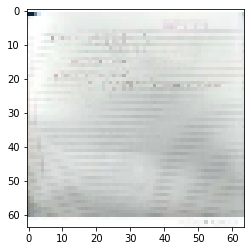

In [4]:
data,original_set=shuffle(data,original_set)
print(len(data))
plt.imshow(data[30][0])
plt.show()
plt.imshow(original_set[30][0])
plt.show()


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5) 
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(3,64,64).view(-1,1,64,64)    
        self.flatten = None
        self.convs(x)             # here we created method to get the size of flattened layer
       
        self.fc1 = nn.Linear(self.flatten, 512)  # here we crweated first FC with no of neurons  equal to the attribute self._to_linear
        self.fc2 = nn.Linear(512, 2) 

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))     # here we created combined CONV<RELU<MAX_POOL layers
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self.flatten is None:
            
            self.flatten = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]     # here we get the shape of flatten layer 

        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self.flatten)  
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return F.softmax(x, dim=1)


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [6]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.0007)
loss_function = nn.MSELoss()

In [7]:
X = torch.Tensor([i[0] for i in data]).view(-1,1,64,64) #here we get images array because we have big list of list in which each list contains
                                                      #first list as image array and second list as label for tha image
                                                      #[[image1,[label 1]],[image2,[label 2]]..................]
X = X/255.0               # here we normalize data
y = torch.Tensor([i[1] for i in data])

In [8]:
test_size = 0.1 
size = int(len(X)*test_size)
print(size)

160


In [9]:
train_X = X[:-size]   
train_y = y[:-size]

test_X = X[-size:]
test_y = y[-size:]
print(len(train_X), len(test_X))

1440 160


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0. Loss: 0.032583706080913544


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1. Loss: 0.025012057274580002


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 2. Loss: 0.025351515039801598


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 3. Loss: 0.03475329279899597


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 4. Loss: 0.023620029911398888


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 5. Loss: 0.021431762725114822


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 6. Loss: 0.011766224168241024


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 7. Loss: 0.008381624706089497


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 8. Loss: 0.020550191402435303


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 9. Loss: 0.015928050503134727


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 10. Loss: 7.575623749289662e-05


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 11. Loss: 0.011041800491511822


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 12. Loss: 0.0008070934563875198


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 13. Loss: 0.0002636853023432195


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 14. Loss: 0.002974805422127247


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 15. Loss: 0.0006337218801490963


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 16. Loss: 6.184821540955454e-05


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 17. Loss: 5.279881224851124e-05


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 18. Loss: 0.00010620810644468293


100%|██████████| 15/15 [00:33<00:00,  2.20s/it]

Epoch: 19. Loss: 0.00017317642050329596


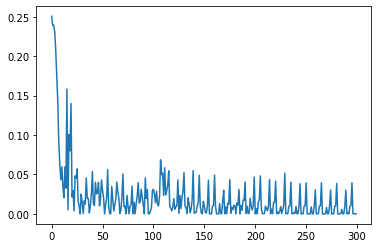

In [10]:
BATCH_SIZE = 100
EPOCHS = 20
lost=[]
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):    # tqdm for seeing progress bar 
        # print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 64,64)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        lost.append(loss)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")

plt.plot(lost) 
plt.show()   

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(train_X))):
        real_class = torch.argmax(train_y[i])
        net_out = net(train_X[i].view(-1, 1, 64,64))[0]  # returns a list, 
        predicted_class = torch.argmax(net_out)                 

        if predicted_class == real_class:
            correct += 1
        total += 1
print("\n")
print("*******************************")        
print("Train Accuracy",round((correct/total)*100, 5))      

100%|██████████| 1440/1440 [00:06<00:00, 220.83it/s]



*******************************
Train Accuracy 99.30556


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 64,64))[0]  # returns a list, 
        predicted_class = torch.argmax(net_out)                 

        if predicted_class == real_class:
            correct += 1
        total += 1
print("\n")
print("*******************************")        
print("Test Accuracy: ", round((correct/total)*100, 5))          # round i susedto rounding of the numbers

100%|██████████| 160/160 [00:00<00:00, 218.00it/s]



*******************************
Test Accuracy:  99.375


In [13]:
test_notes=data[10:20]
ori_notes=original_set[10:20]
test_memes=data[1500:1510]
ori_memes=original_set[1500:1510]
for i in test_memes:
  test_notes.append(i)

for j in ori_memes:
  ori_notes.append(j)

ori_set=ori_notes
random_set=test_notes


random_set= torch.Tensor([i[0] for i in random_set]).view(-1,1,64,64)
random_set = random_set/255.0 


In [14]:
ori_set,random_set=shuffle(ori_set,random_set)

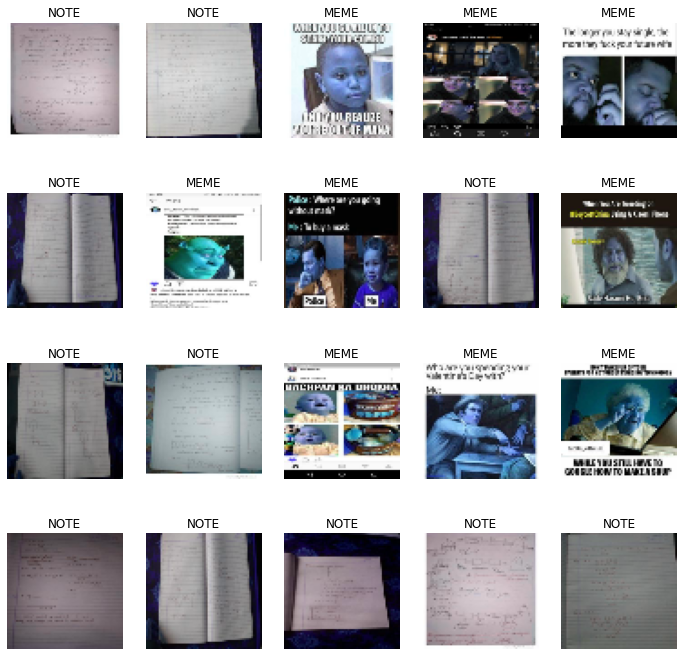

In [15]:
fig = plt.figure(figsize=(12,12))
rows = 4
columns = 5
for i in range(20):
    net_out = net(random_set[i].view(-1, 1, 64,64))[0]  # returns a list, 
    predicted_class = torch.argmax(net_out) 
    if (predicted_class==0):
      ans="MEME"
    else:
      ans="NOTE"                  
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(ori_set[i][0])
    plt.axis('off')
    plt.title(ans)